## Problem Definition
Based on the data can we predict the close and open values for the next 30 days?

## Data Dictionary

symbol : - Name of the company (in this case Google)

date :- year and date

close:- closing of stock value

high:- highest value of stock at that day

low:- lowest value of stock at that day

open:- opening value of stock at that day

volume:- total number of stocks traded

adjClose:-(Adjusted closing price) The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions

adjHigh:- (Adjusted High)

adjLow:- (Adjusted Low)

adjOpen:- (Adjusted Opening Price)

adjVolume:- (Adjusted Volume)

divCash:- (Dividend) a distribution of some company's earning

splitFactor:- A stock split is a decision by a company's board of directors to increase the number of shares that are outstanding by issuing more shares to current shareholders

## Importing Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [14]:
df = pd.read_csv("data/GOOG.csv")

## Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-02-16 00:00:00+00:00,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0.0,1.0
1,GOOG,2016-02-17 00:00:00+00:00,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0.0,1.0
2,GOOG,2016-02-18 00:00:00+00:00,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0.0,1.0
3,GOOG,2016-02-19 00:00:00+00:00,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0.0,1.0
4,GOOG,2016-02-22 00:00:00+00:00,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0.0,1.0


In [5]:
df.value_counts('symbol')

symbol
GOOG    1257
dtype: int64

In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2021-02-04 00:00:00+00:00,2062.37,2078.5500,2042.59,2068.89,1852329,2062.37,2078.5500,2042.59,2068.89,1852329,0.0,1.0
1253,GOOG,2021-02-05 00:00:00+00:00,2098.00,2102.5100,2059.33,2070.00,1535135,2098.00,2102.5100,2059.33,2070.00,1535135,0.0,1.0
1254,GOOG,2021-02-08 00:00:00+00:00,2092.91,2123.5469,2072.00,2105.91,1242411,2092.91,2123.5469,2072.00,2105.91,1242411,0.0,1.0
1255,GOOG,2021-02-09 00:00:00+00:00,2083.51,2105.1300,2078.54,2078.54,886247,2083.51,2105.1300,2078.54,2078.54,886247,0.0,1.0
1256,GOOG,2021-02-10 00:00:00+00:00,2095.38,2108.3700,2063.09,2094.21,1132741,2095.38,2108.3700,2063.09,2094.21,1132741,0.0,1.0


In [7]:
df.isna().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

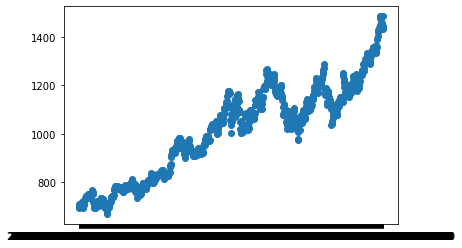

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["date"][:1000], df["close"][:1000]);

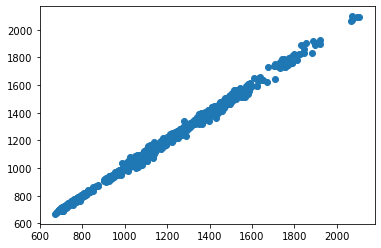

In [41]:
fig, ax = plt.subplots()
ax.scatter(df["open"], df["close"]);

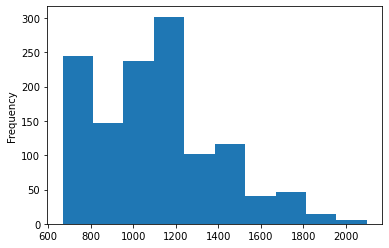

In [42]:
df.adjClose.plot.hist();

In [23]:
df.value_counts('divCash')

divCash
0.0    1257
dtype: int64

In [24]:
df.value_counts('splitFactor')

splitFactor
1.0    1257
dtype: int64

Both divCash and splitFactor have 1 value across the board so they will most likely not be significant in predicting stock prices for Google shares

Leaving off here, next time create visuals to compare adj to regular of all three types of info (Close, High, Low, Open, Volume)

### Comparing adjusted values to the original values

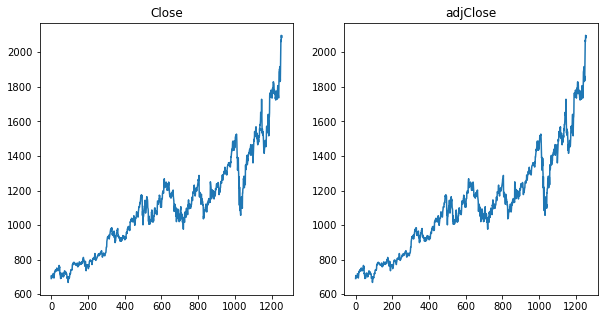

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(10,5),)

ax1.plot(df.close)
ax2.plot(df.adjClose)
ax1.title.set_text('Close')
ax2.title.set_text('adjClose')

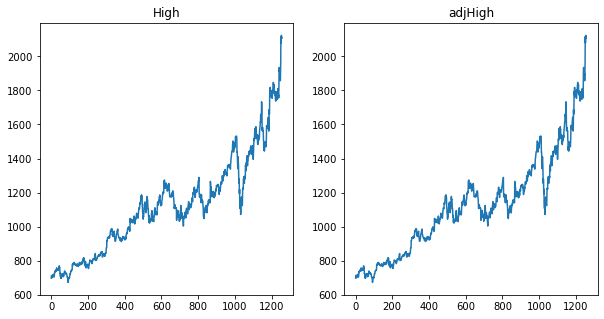

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(10,5),)

ax1.plot(df.high)
ax2.plot(df.adjHigh)
ax1.title.set_text('High')
ax2.title.set_text('adjHigh')

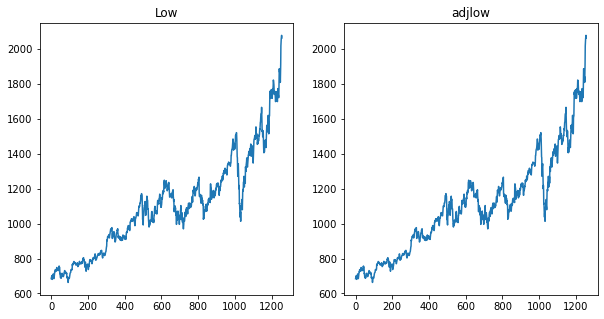

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(10,5),)

ax1.plot(df.low)
ax2.plot(df.adjLow)
ax1.title.set_text('Low')
ax2.title.set_text('adjlow')

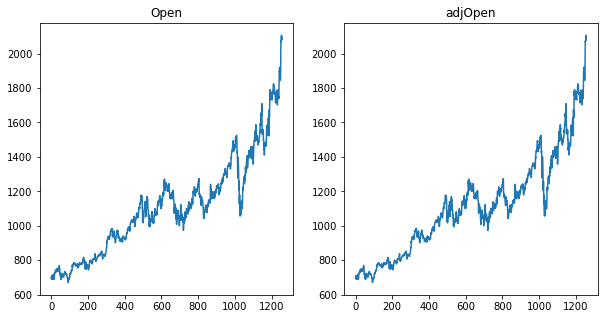

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(10,5),)

ax1.plot(df.open)
ax2.plot(df.adjOpen)
ax1.title.set_text('Open')
ax2.title.set_text('adjOpen')

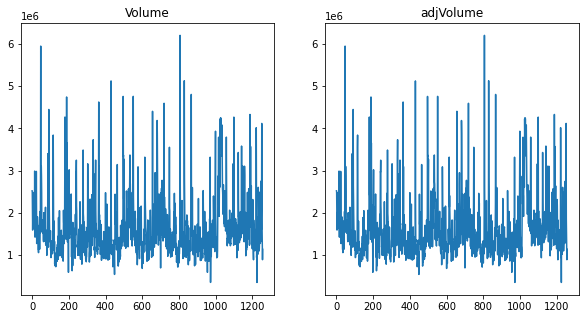

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(10,5),)

ax1.plot(df.volume)
ax2.plot(df.adjVolume)
ax1.title.set_text('Volume')
ax2.title.set_text('adjVolume')

From all of the comparison graphs above we can see that the adjusted values were very similar to their original values in all categories. We can infer here there was very little to no adjusted changes typically.

### Parse the Dates of the Data Frame

In [15]:
df = pd.read_csv("data/GOOG.csv",
                low_memory=False,
                parse_dates=["date"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       1257 non-null   object             
 1   date         1257 non-null   datetime64[ns, UTC]
 2   close        1257 non-null   float64            
 3   high         1257 non-null   float64            
 4   low          1257 non-null   float64            
 5   open         1257 non-null   float64            
 6   volume       1257 non-null   int64              
 7   adjClose     1257 non-null   float64            
 8   adjHigh      1257 non-null   float64            
 9   adjLow       1257 non-null   float64            
 10  adjOpen      1257 non-null   float64            
 11  adjVolume    1257 non-null   int64              
 12  divCash      1257 non-null   float64            
 13  splitFactor  1257 non-null   float64            
dtypes: datetime64[ns, UTC](1

In [17]:
df.date[:1000]

0     2016-02-16 00:00:00+00:00
1     2016-02-17 00:00:00+00:00
2     2016-02-18 00:00:00+00:00
3     2016-02-19 00:00:00+00:00
4     2016-02-22 00:00:00+00:00
                 ...           
995   2020-01-29 00:00:00+00:00
996   2020-01-30 00:00:00+00:00
997   2020-01-31 00:00:00+00:00
998   2020-02-03 00:00:00+00:00
999   2020-02-04 00:00:00+00:00
Name: date, Length: 1000, dtype: datetime64[ns, UTC]

In [18]:
# Make a copy of the dataframe
df_tmp = df.copy()

In [20]:
df_tmp["Year"] = df_tmp.date.dt.year
df_tmp["Month"] = df_tmp.date.dt.month
df_tmp["Day"] = df_tmp.date.dt.day
df_tmp["DayOfWeek"] = df_tmp.date.dt.dayofweek
df_tmp["DayOfYear"] = df_tmp.date.dt.dayofyear

In [22]:
df_tmp.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Year,Month,Day,DayOfWeek,DayOfYear
0,GOOG,2016-02-16 00:00:00+00:00,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0.0,1.0,2016,2,16,1,47
1,GOOG,2016-02-17 00:00:00+00:00,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0.0,1.0,2016,2,17,2,48
2,GOOG,2016-02-18 00:00:00+00:00,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0.0,1.0,2016,2,18,3,49
3,GOOG,2016-02-19 00:00:00+00:00,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0.0,1.0,2016,2,19,4,50
4,GOOG,2016-02-22 00:00:00+00:00,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0.0,1.0,2016,2,22,0,53


In [23]:
# Drop the original date column
df_tmp.drop("date", axis=1, inplace=True)

In [26]:
# Dropping the symbol column since it is all the same information and an object
df_tmp.drop("symbol", axis=1, inplace=True)

KeyError: "['symbol'] not found in axis"

In [27]:
df_tmp.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Year,Month,Day,DayOfWeek,DayOfYear
0,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0.0,1.0,2016,2,16,1,47
1,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0.0,1.0,2016,2,17,2,48
2,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0.0,1.0,2016,2,18,3,49
3,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0.0,1.0,2016,2,19,4,50
4,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0.0,1.0,2016,2,22,0,53


## Modeling

In [31]:
df_tmp.drop(['divCash', 'splitFactor'], axis=1, inplace= True)

In [58]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [59]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [62]:
# Train test split
from sklearn.model_selection import train_test_split

def VarForecasting(Actual):
        model = VAR(Actual)
        model_fit = model.fit()
        prediction = model_fit.forecast(model_fit.y, steps=10) # predicting all the next 10 values at each step
        return np.array(prediction)

In [63]:
close_predictions=[]
open_predictions=[]
for timepoint in range(0, len(test)):
    Actual_train = df_tmp.iloc[timepoint:timepoint + len(train)]
    Prediction = VarForecasting(Actual_train)
    close_predictions.append(Prediction[:,0])
    open_predictions.append(Prediction[:,3])

C:\Users\Dschy\OneDrive\Desktop\Kaggle-Projects\google-stock-prediction\env\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [64]:
close_predictions[0]

array([1511.43134839, 1510.03244335, 1508.61809544, 1507.0951527 ,
       1505.54192071, 1503.98093407, 1502.42678112, 1500.88839812,
       1499.37170073, 1497.88066619])

In [65]:
np.array(close_predictions).shape

(252, 10)

In [67]:
test.shape

(252, 15)

## Prediction Visualization and Analysis

In [68]:
# at each step, the te
p_close= [close_predictions[i][0] for i in range(len(close_predictions))]
p_open= [open_predictions[i][0] for i in range(len(open_predictions))]

Text(0.5, 0, 'open')

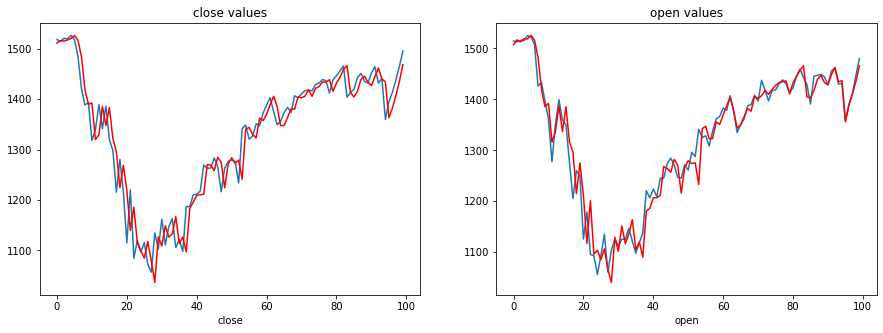

In [69]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.array(test['close'])[0:100])
plt.plot(p_close[0:100],'r')
plt.title('close values')
plt.xlabel('close')
plt.subplot(1,2,2)
plt.plot(np.array(test['open'])[0:100])
plt.plot(p_open[0:100], 'r' )
plt.title('open values')
plt.xlabel('open')

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math 
print(math.sqrt(mean_squared_error(np.array(test['open']),p_open )))
print(math.sqrt(mean_squared_error(np.array(test['close']),p_close )))

## R2 score:
print('R2 score of the Close series',r2_score(np.array(test['close']),p_close ))
print('R2 score of the open series',r2_score(np.array(test['open']),p_close ))

24.09547280212269
34.39828335261629
R2 score of the Close series 0.9748536075151012
R2 score of the open series 0.9875756602871467
